Kaushal Joshi A026   
Ashish Paithankar A044  
Nikita mahse A038  

Data link : https://drive.google.com/file/d/1qfQXbu1X71-Nv_tV9l5NgQzAfllw3Uuz/view?usp=sharing  
This data contains 8271 rows and 5 columns mentioned below:  
1) serial number from 0 to 8271  
2) business_id: This column contains unique identifiers for the restaurants or businesses being reviewed. Each business_id corresponds to a specific restaurant or establishment.  
3)user_id: This column contains unique identifiers for the users who submitted the reviews. Each user_id corresponds to a specific user who provided feedback.  
4)review_text: This column contains the textual content of the reviews submitted by users. It includes the actual feedback, opinions, and comments shared by users about their experiences at the restaurants.  
5)rating: This column contains numerical ratings provided by users in their reviews. Ratings are often given on a scale, such as 1 to 5 stars, where higher values indicate better experiences.

In [61]:
import json
import pandas as pd

data = []

# Open the file and read lines
with open('/content/Text_classification.json', 'r') as f:
    for line in f:
        try:
            # Parse JSON
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError:
            # Ignore lines with invalid JSON and continue with the next line
            continue

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(data)

# print(df)

In [62]:
df.shape

(31727, 5)

In [ ]:
df.head()

,business_id,user_id,rating,review_text,pics
0,605730f68cd0e3d69a52284b,113890892872599852766,4,We came for a birthday brunch and this place i...,[{'id': 'AF1QipPrls2G30PS3tyC55KBxUrKgy3ER0AB5...
1,605730f68cd0e3d69a52284b,100158382312395993536,5,"Cool place to hang out, have drinks. There is...",[{'id': 'AF1QipPj8FEVZrdpTZmRdjoOtzQyfGYSwJ0Ub...
2,605730f68cd0e3d69a52284b,113495161718980109602,2,This place doesn’t rock the senses when it com...,[{'id': 'AF1QipOP5poDTRQ4XXIM11buv5x9Ae-BNXwcq...
3,605730f68cd0e3d69a52284b,111259544401075262963,3,Pretty cool place to hang out with friends and...,[{'id': 'AF1QipMq84NEaCMdQtfrELbudJdQbTILp_5I_...
4,605730f68cd0e3d69a52284b,104285463275063919410,5,We saw this place the other day when we had re...,[{'id': 'AF1QipOTCVzPHHWTiQO_2UZNVeG5KMbcki6d5...


In [48]:
df.drop(columns=['pics'],inplace = True)

In [ ]:
# prompt: df.describe().transpose()   write df for only object types

df.select_dtypes(include='object').describe().transpose()


,count,unique,top,freq
business_id,11167,407,60571c0d8cd0e3d69a52281e,1006
user_id,11167,11007,100078114554438512933,8
review_text,11167,11138,(Translated by Google) Excellent place\n\n(Ori...,4


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,11167.0,4.456524,1.000387,1.0,4.0,5.0,5.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  11167 non-null  object
 1   user_id      11167 non-null  object
 2   rating       11167 non-null  int64 
 3   review_text  11167 non-null  object
dtypes: int64(1), object(3)
memory usage: 349.1+ KB


In [ ]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
business_id,0,0.0
user_id,0,0.0
rating,0,0.0
review_text,0,0.0


In [49]:
import numpy as np
df['Sentiment'] = np.where(df['rating'] >= 4, 'Happy', 'Unhappy')

In [50]:
df2 = df.copy()

Percentage for default

Happy      87.65
Unhappy    12.35
Name: Sentiment, dtype: float64


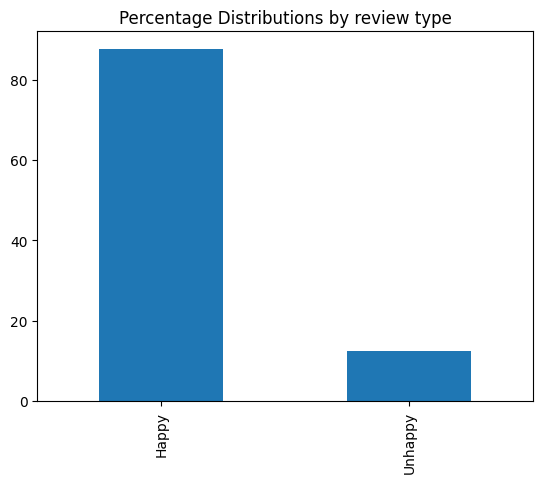

In [ ]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df.Sentiment.value_counts(normalize=True)*100,2))
round(df.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [ ]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [ ]:
df.columns

Index(['business_id', 'user_id', 'rating', 'review_text', 'Sentiment'], dtype='object')

In [ ]:
# Let's take a look at the updated text
df['cleaned_reviewText'] = pd.DataFrame(df.review_text.apply(cleaned1))
df.head(2)

,business_id,user_id,rating,review_text,Sentiment,cleaned_reviewText
0,605730f68cd0e3d69a52284b,113890892872599852766,4,We came for a birthday brunch and this place i...,Happy,we came for a birthday brunch and this place i...
1,605730f68cd0e3d69a52284b,100158382312395993536,5,"Cool place to hang out, have drinks. There is...",Happy,cool place to hang out have drinks there is a...


In [ ]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [ ]:
# Let's take a look at the updated text
df['cleaned_reviewText_new'] = pd.DataFrame(df['cleaned_reviewText'].apply(cleaned2))
df.head(2)

,business_id,user_id,rating,review_text,Sentiment,cleaned_reviewText,cleaned_reviewText_new
0,605730f68cd0e3d69a52284b,113890892872599852766,4,We came for a birthday brunch and this place i...,Happy,we came for a birthday brunch and this place i...,we came for a birthday brunch and this place i...
1,605730f68cd0e3d69a52284b,100158382312395993536,5,"Cool place to hang out, have drinks. There is...",Happy,cool place to hang out have drinks there is a...,cool place to hang out have drinks there is a...


**Model training**

In [ ]:
from sklearn.model_selection import train_test_split

Independent_var = df.cleaned_reviewText_new
Dependent_var = df.Sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 10050
IV_test  : 1117
DV_train : 10050
DV_test  : 1117


**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix, classification_report

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[971,  87],
       [  6,  53]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.9167412712623098
Precision :  0.9613592418436415
Recall :  0.9167412712623098


In [ ]:
example = ["I'm not happy very bad "]
result = model.predict(example)

print(result)

['Happy']


TF-IDF analysis can highlight important words and phrases within the reviews based on their frequency and rarity across the dataset. These keywords can provide insights into the most discussed topics or aspects of the restaurants.

POS tagging can further refine the identification of important terms by categorizing them into parts of speech. For example, nouns extracted using POS tagging can represent entities or features discussed in the reviews, while adjectives can indicate sentiments or opinions associated with these entities.

So let's apply POS tagging and see the changes

**POS Tagging**

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

reviews = df['cleaned_reviewText_new']

# Function to perform POS tagging on a given text
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

# Perform POS tagging on each review
for i, review in enumerate(reviews):
    print(f"Review {i+1}:")
    pos_tags = pos_tagging(review)
    print(pos_tags)
    print()

Streaming output truncated to the last 5000 lines.
[('service', 'NOUN'), ('is', 'AUX'), ('typically', 'ADV'), ('decent', 'ADJ'), ('here', 'ADV'), ('have', 'AUX'), ('visited', 'VERB'), ('a', 'DET'), ('few', 'ADJ'), ('times', 'NOUN'), ('they', 'PRON'), ('experience', 'VERB'), ('rushes', 'NOUN'), ('being', 'AUX'), ('close', 'ADJ'), ('to', 'ADP'), ('the', 'DET'), ('boardwalk', 'NOUN'), ('but', 'CCONJ'), ('handle', 'VERB'), ('it', 'PRON'), ('ok', 'ADP'), (' ', 'SPACE'), ('the', 'DET'), ('food', 'NOUN'), ('is', 'AUX'), ('fine', 'ADJ'), (' ', 'SPACE'), ('what', 'PRON'), ('you', 'PRON'), ('would', 'AUX'), ('expect', 'VERB'), ('from', 'ADP'), ('a', 'DET'), ('big', 'ADJ'), ('chain', 'NOUN'), (' ', 'SPACE'), ('decent', 'ADJ'), ('value', 'NOUN'), ('and', 'CCONJ'), ('prices', 'NOUN'), ('for', 'ADP'), ('portions', 'NOUN'), (' ', 'SPACE'), ('a', 'DET'), ('consistently', 'ADV'), ('rotating', 'VERB'), ('menu', 'NOUN'), (' ', 'SPACE'), ('average', 'ADJ'), ('meal', 'NOUN'), ('is', 'AUX'), ('probably', 'A

**Learnings**

This code utilizes spaCy to process a collection of reviews, extracting their part-of-speech (POS) tags for each word.   
It iterates through each review, tokenizes it, and retrieves the POS tags using spaCy's POS tagging functionality.   
The extracted POS tags, along with their corresponding words, are stored in a list named all_pos_tags, which is printed at the end to display the POS tags for each review.

**Bag of Words**

In [63]:
df2 = df.copy()

In [64]:
# library to clean data
import re

# Natural Language Tool Kit
import nltk

nltk.download('stopwords')

# to remove stopword
from nltk.corpus import stopwords

# for Stemming propose
from nltk.stem.porter import PorterStemmer

# Initialize empty array
# to append clean text
corpus = []

# 1000 (reviews) rows to clean
for i in range(0, 6848):

	# column : "Review", row ith
	review = re.sub('[^a-zA-Z]', ' ', df2['review_text'][i])

	# convert all cases to lower cases
	review = review.lower()

	# split to array(default delimiter is " ")
	review = review.split()

	# creating PorterStemmer object to
	# take main stem of each word
	ps = PorterStemmer()

	# loop for stemming each word
	# in string array at ith row
	review = [ps.stem(word) for word in review
				if not word in set(stopwords.words('english'))]

	# rejoin all string array elements
	# to create back into a string
	review = ' '.join(review)

	# append each string to create
	# array of clean text
	corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative



In [65]:
# prompt: apply label endcoder to sentiment
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder on the 'Sentiment' column
encoder.fit(df2['Sentiment'])

# Transform the 'Sentiment' column using the encoder
df2['Sentiment'] = encoder.transform(df2['Sentiment'])

# Print the transformed 'Sentiment' column
df2.head()


KeyError: 'Sentiment'

In [67]:
y = df2.iloc[:, 2].values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
df2.shape

(31727, 5)

In [68]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


ValueError: Found input variables with inconsistent numbers of samples: [6848, 31727]

In [ ]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier

# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators = 501,
							criterion = 'entropy')

model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=501)

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

y_pred


array([5, 5, 5, ..., 5, 5, 5])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

cm


array([[  11,    0,    1,    1,   47],
       [   2,    0,    0,    6,   36],
       [   1,    0,    2,    9,   72],
       [   0,    0,    1,   26,  297],
       [   0,    0,    2,   17, 1181]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.18      0.30        60
           2       0.00      0.00      0.00        44
           3       0.33      0.02      0.04        84
           4       0.44      0.08      0.14       324
           5       0.72      0.98      0.83      1200

    accuracy                           0.71      1712
   macro avg       0.46      0.25      0.26      1712
weighted avg       0.63      0.71      0.62      1712



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bag of Words techniques allows for a comprehensive analysis of textual data, enabling the extraction of valuable insights, patterns, and trends from restaurant review datasets. These insights can inform various stakeholders, including restaurant owners, marketers, and researchers, to make data-driven decisions and improvements.

**Future Scope**  
1) Investigate advanced sentiment analysis techniques such as deep learning models like LSTM or Transformer-based architectures to gain a better understanding of nuanced sentiments.  

2) Consider integrating your NLP pipeline with real-time data streams or web scraping tools to continuously collect and analyze customer feedback, allowing businesses to gain dynamic insights.  

3) Enhancement through hybrid approaches combining Bag of Words with contextual word embeddings like Word2Vec or BERT.  

4) Adaptation for emerging domains like healthcare, finance, and cybersecurity for text data analysis and insights extraction.